In [1]:

import cv2
import numpy as np
import dlib
import scipy


In [2]:

#img1=cv2.imread('./chahat_c.jpeg')
#img1_2=cv2.imread('./nitin.jpg')

img1=cv2.imread('./joker-2-joaquin-phoenix-batman-robert-pattinson-1186783.jpg')
img=img1.copy()
img2=img1.copy()
img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
#img2_gray=cv2.cvtColor(img1_2,cv2.COLOR_BGR2GRAY)
#img1=cv2.resize(img1,(500,500))

In [3]:
import matplotlib.pyplot as plt

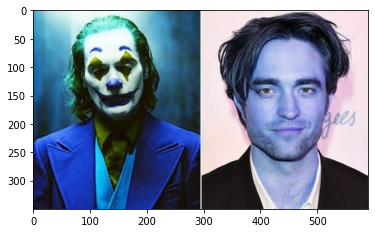

In [4]:
plt.imshow(img1,cmap="gray")

In [5]:
def detect_face(img1_gray):
    hog_detector=dlib.get_frontal_face_detector()
    hog_predictor=dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
    rects=hog_detector(img1_gray)
    no_of_faces=len(rects)
    return no_of_faces,hog_predictor,rects
def landmarks_extraction(img1_gray,hog_predictor):
    bounding_box=[]
    multi_img_face_lm=[]

    landmarks_index_list=[]
    landmarks_index={}
    x_=(hog_predictor(img1_gray,rects[i]))
    facial_landmarks=np.array([[x_.part(i).x ,x_.part(i).y] for i in range(68) ])
    #if iter_landmarks==1:
    for ind,val in enumerate(facial_landmarks):
        landmarks_index[tuple(val)]=ind
    landmarks_index_list.append(landmarks_index)
    multi_img_face_lm.append(facial_landmarks)
    x=[]

    x.append((rects[i].left(),rects[i].top(),rects[i].right(),rects[i].bottom()))    

    bounding_box.append(x)
    return

In [7]:
#rects=hog_detector(img2_gray)
no_of_faces,hog_predictor,rects=detect_face(img1_gray)
# if no_of_faces==2:
    

#rects[0].rectangl
#x_=[]
bounding_box=[]
multi_img_face_lm=[]

landmarks_index_list=[]
#iter_landmarks=1
for i in range(len(rects)):
    landmarks_index={}
    #print(i)
    x_=(hog_predictor(img1_gray,rects[i]))
    facial_landmarks=np.array([[x_.part(i).x ,x_.part(i).y] for i in range(68) ])
    #if iter_landmarks==1:
    for ind,val in enumerate(facial_landmarks):
        landmarks_index[tuple(val)]=ind
    landmarks_index_list.append(landmarks_index)
    multi_img_face_lm.append(facial_landmarks)
    #x=np.array(x)    
#rects[0].shape
    
#[i for i in range(10)]
#len(rects)

    # for i in rects:
    x=[]
    #x.append()
    #x.append()
    x.append((rects[i].left(),rects[i].top(),rects[i].right(),rects[i].bottom()))    
    #x.append()
    #print(rects)
    bounding_box.append(x)
#print(y)
multi_img_face_lm=np.array(multi_img_face_lm)
#multi_img_face_lm=np.reshape(multi_img_face_lm,(multi_img_face_lm.shape[0]*multi_img_face_lm.shape[1],multi_img_face_lm.shape[2]))
#print(multi_img_face_lm.shape)
#y[0][0]

#y[0][:]       #print(i)

In [77]:
multi_img_face_lm[0][0]

array([366, 147])

In [78]:
for j in range(1,3):
    for i in range(68): 
        cv2.circle(img1,multi_img_face_lm[j-1][i][:],color=[255,255,255],radius=5,thickness=2)
    #print(j)
    img1_1=cv2.rectangle(img1.copy(),(bounding_box[j-1][0][0],bounding_box[j-1][0][1]),(bounding_box[j-1][0][2],bounding_box[j-1][0][3]),color=[255,0,255],thickness=5)
    #j=1

img1_1=cv2.rectangle(img1.copy(),( 377,95), ( 526,244),color=[255,255,255],thickness=5)
j=2




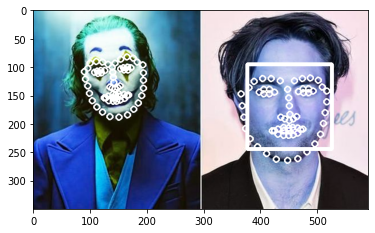

In [79]:
plt.imshow(img1_1,cmap='gray')

In [80]:
len(landmarks_index_list[1])


68

In [81]:
multi_img_face_lm.shape

(2, 68, 2)

In [82]:
subdiv2=[]
rect_=[]
for i in range(2):
    x,y,w,h=(cv2.boundingRect(cv2.convexHull(multi_img_face_lm[i])))
    subdiv2.append(cv2.Subdiv2D((x,y,x+w,y+h)))
    rect_.append(((x,y),(x+w,y+h)))
#rect1=cv2.boundingRect(rect[1])
rect_

[((366, 119), (518, 265)), ((90, 82), (195, 189))]

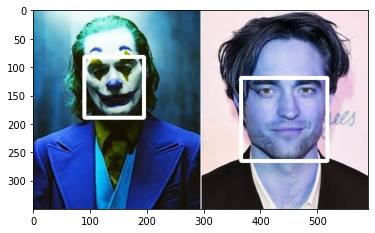

In [83]:
for rect in rect_:
    
    plt.imshow(cv2.rectangle(img,rect[0],rect[1],[255,255,255],5))
plt.imshow(img.copy())

In [84]:
iter_for_sub=0 
for sub in subdiv2:
    i=1
    for p in multi_img_face_lm[iter_for_sub].tolist():
        sub.insert(tuple(p))
        
        #print(i)
        i+=1
    iter_for_sub+=1
    #print(tuple(p))

In [85]:

delunay_traingle_pts_list=[]
for sub in subdiv2:
    delunay_traingle_pts_list.append(sub.getTriangleList())

def check_point(pts,box):
    (xmin,ymin),(xmax,ymax)=box
   # xmax,ymax= xmin+w,ymin+h
    if pts[0]>xmin and pts[1]>ymin and pts[0]<xmax and pts[1]<ymax:
        return True
    else:
        return False
    
sorted_delunay_lists=[]
sorting_index_for_delunay_list=[]
iter_=0
#for delunay_traingle_points,landmark_index_ in zip(delunay_traingle_pts_list,landmarks_index_list):
index_array_img=[]
sorted_delunay_pts1=[]
sorted_delunay_pts2=[]
sorting_index_for_delunay=[]
for p in delunay_traingle_pts_list[0]:
    pts1=(int(p[0]),int(p[1]))
    pts2=(int(p[2]),int(p[3]))    
    pts3=(int(p[4]),int(p[5]))        
    #print(pts1)
    box=rect_[iter_]
    if check_point(pts1,box) and check_point(pts2,box) and check_point(pts3,box) or True :
        pts_vector1=np.array([pts1,pts2,pts3])
        pts_vector2=np.zeros(pts_vector1.shape,dtype=np.int32)
        #print(pts_vector1)
        #index_array=np.zeros(3)
        #for 
        index_array=[]
        index=landmarks_index_list[0].get(tuple(pts1),False)
        if index:
            #index_array[0]=index
            index_array.append(index)
            pts_vector2[0]=multi_img_face_lm[1][index]

        else:
            continue
        index=landmarks_index_list[0].get(tuple(pts2),False)
        #pts_vector2[0]=multi_img_face_lm[0][index]
        if index:
            # index_array[1]=index
            index_array.append(index)
            pts_vector2[1]=multi_img_face_lm[1][index]
        else:
            continue
        index=landmarks_index_list[0].get(tuple(pts3),False)
        if index:
            # index_array[2]=index
            index_array.append(index)
            pts_vector2[2]=multi_img_face_lm[1][index]
            #print(pts_vector)
        else:
            continue
        #index_add.append()
        if len(index_array)!=3:
            print('False')
        index_array=np.array(index_array)
        index_to_sort=np.argsort(index_array)
        index_array=index_array[index_to_sort]
        pts_vector1=pts_vector1[index_to_sort,:]
        pts_vector2=pts_vector2[index_to_sort,:]
        #print(pts_vector.shape)
        inds=''
        #print(index_array)

        for ind_x in index_array:
            ind_x=int(ind_x)
            inds=inds+str(ind_x)
        index_array_img.append(int(inds))
        #index_array_img.append(index_array)
        sorted_delunay_pts1.append(pts_vector1)
        sorted_delunay_pts2.append(pts_vector2)
        cv2.line(img1,pts1,pts2,[255,0, 255],1)
        cv2.line(img1,pts3,pts2,[255,0,255],1)
        cv2.line(img1,pts3,pts1,[255,0,255],1)
        cv2.line(img1,(pts_vector2[0,0],pts_vector2[0,1]),(pts_vector2[1,0],pts_vector2[1,1]),[255,0, 255],1)
        cv2.line(img1,(pts_vector2[2,0],pts_vector2[2,1]),(pts_vector2[1,0],pts_vector2[1,1]),[255,0,255],1)
        cv2.line(img1,(pts_vector2[2,0],pts_vector2[2,1]),(pts_vector2[0,0],pts_vector2[0,1]),[255,0,255],1)
iter_=iter_+1
sorted_delunay_pts1=np.array(sorted_delunay_pts1)
sorted_delunay_pts2=np.array(sorted_delunay_pts2)
sorted_delunay_lists.append(sorted_delunay_pts1)
sorted_delunay_lists.append(sorted_delunay_pts2)

index_array_img=np.array(index_array_img)

sorting_index_for_delunay_list.append(index_array_img)
#break
#index=np.argsort(sorting_index_for_delunay_list[0])
#sorting_index_for_delunay_list[0]=sorting_index_for_delunay_list[0][index]
#sorted_delunay_lists[0]=sorted_delunay_lists[0][index]
#index=np.argsort(sorting_index_for_delunay_list[1])
#sorting_index_for_delunay_list[1]=sorting_index_for_delunay_list[1][index]
#sorted_delunay_lists[1]=sorted_delunay_lists[1][index]
#sorted_delunay_lists[1]=sorted_delunay_lists[1][index]
#index
#index_array_img
#sorting_index_for_delunay_list[0]
#sorting_index_for_delunay_list[1]
delunay_traingle_pts_list=sorted_delunay_lists
# temp=delunay_traingle_pts_list[0]
# delunay_traingle_pts_list[0]=delunay_traingle_pts_list[1]
# delunay_traingle_pts_list[1]=temp

In [86]:
delunay_traingle_pts_list[0].shape

(105, 3, 2)

In [87]:
arr2D = np.array([[11, 12, 13, 22], [21, 7, 23, 14], [31, 10, 33, 7]])
array1D=[20,10,30]
arr2D[np.argsort(array1D),:]

array([[21,  7, 23, 14],
       [11, 12, 13, 22],
       [31, 10, 33,  7]])

In [88]:
int('1')

1

(350, 590, 3)

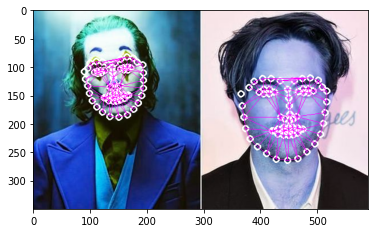

In [89]:
plt.imshow(img1)
img1.shape

In [90]:
# delunay_traingle_points[0].reshape(3,2)

In [91]:
#delunay_traingle_points[0]

In [92]:
def global_cord_img(x_,y_,h_,w_):
    l1=np.arange(x_-1,x_+h_+1)
    l2=np.arange(y_-1,y_+w_+1)
    a=np.meshgrid(l1,l2)
    a=np.array(a)
    #a
    a=np.moveaxis(a,0,-1)
    ones=np.ones((a.shape[0],a.shape[1],1))
    g_cord=np.concatenate([a,ones],-1)
    return g_cord
#a.shape
#ones.shape

In [93]:
#delunay_traingle_points[0]
def bilinear_interpolate(im, x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, im.shape[1]-1);
    x1 = np.clip(x1, 0, im.shape[1]-1);
    y0 = np.clip(y0, 0, im.shape[0]-1);
    y1 = np.clip(y1, 0, im.shape[0]-1);

    Ia = im[ y0, x0 ]
    Ib = im[ y1, x0 ]
    Ic = im[ y0, x1 ]
    Id = im[ y1, x1 ]

    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)

    return wa*Ia + wb*Ib + wc*Ic + wd*Id

In [99]:
import scipy
s

In [98]:
def image_warping(del_tri_pts1,del_tri_pts2,img2):
    #x_,y_,h_,w_=cv2.boundingRect((delunay_traingle_pts_list[0][0].reshape(3,2)))
    x_,y_,h_,w_=cv2.boundingRect((del_tri_pts1.reshape(3,2)))
    #x_,y_,h_,w_=cv2.boundingRect((.reshape(3,2)))
    #img_idx=np.linspace()
    bounded_array=global_cord_img(x_,y_,h_,w_)
    m,n,z=bounded_array.shape
    bounded_array=np.reshape(bounded_array,(m*n,z))
    #bounded_array=img[x_:x_+h_,y_:y_+w_]
    B=np.ones((3,3))
    B[0:2,:]=del_tri_pts1.reshape(3,2).T
    if np.linalg.det(B) ==1:
        B_inv=np.linalg.pinv(B)
    else:
        B_inv=np.linalg.inv(B)
    #B_inv    

    bayesian_coordinates=(B_inv@bounded_array.T).T
    mask=np.ones(bayesian_coordinates.shape)
    zero_arr_1=~np.any(bayesian_coordinates>1.01,axis=1)
    zero_arr_2=~np.any(bayesian_coordinates<-0.01,axis=1)
    zero_arr=np.multiply(zero_arr_1,zero_arr_2)
    zero_condition_1=np.stack((zero_arr,zero_arr,zero_arr)).T
    #zero_condition_2=(np.sum(bayesian_coordinates,axis=1)<=1 )
    #print(zero_condition_2.shape)
    #zero_condition_2=np.stack((zero_condition_2,zero_condition_2,zero_condition_2)).T

    mask=np.multiply(zero_condition_1,1)
    #bayesian_coordinates.shape
    #bayesian_coordinates[mask].shape
    bayesian_coordinates_f=np.multiply(bayesian_coordinates,mask)
    bounded_array_f=np.multiply(bounded_array,mask)
    bounded_array_f=bounded_array_f[~np.all((bounded_array_f)==0,axis=1)]
    bayesian_coordinates_f=bayesian_coordinates_f[~np.all((bayesian_coordinates_f)==0,axis=1)]

    
    A=np.ones((3,3))
    A[0:2,:]=del_tri_pts2.reshape(3,2).T



    A_coord=A@bayesian_coordinates_f.T
    A_coord=A_coord/A_coord[-1]
    
    A_coord=A_coord.astype(np.int32).T
    bounded_array_f=bounded_array_f.astype(np.int32)
    bounded_array_f=bounded_array_f[:,:2]
    A_coord=A_coord[:,:2]
#bounded_array_f

    #print(bounded_array_f.shape)

    #A_coord=np.array(A_coord/A_coord[:,-1])
    #A_coord=A_coord[:,:2]
    temp=img2[A_coord[:,1],A_coord[:,0]]
    img2[A_coord[:,1],A_coord[:,0]]=img2[bounded_array_f[:,1],bounded_array_f[:,0]]
    img2[bounded_array_f[:,1],bounded_array_f[:,0]]=temp
    img3[A_coord[:,1],A_coord[:,0]]=img2[A_coord[:,1],A_coord[:,0]]
    img3[bounded_array_f[:,1],bounded_array_f[:,0]]=temp
    Y,X=np.meshgrid(A_coord[:,1],A_coord[:,0])
    f=scipy.interpolate.interp2d(A_coord[:,1],A_coord[:,0],img2[A_coord[:,1],A_coord[:,0]].T)
    img2[A_coord[:,1],A_coord[:,0]]=f(X,Y)
    
#A_coord
img3=np.zeros(img2.shape,dtype=np.uint8)
for i in range(len(delunay_traingle_pts_list[0])):
    image_warping(delunay_traingle_pts_list[0][i],delunay_traingle_pts_list[1][i],img2)
plt.imshow(img2)
#img2.shape

ValueError: Invalid length for input z for non rectangular grid

In [41]:
import scipy.interpolate
scipy.interpolate.interp2d(A_coord[0,:],A_coord[1,:],img[A_coord[:,0:2],:])

NameError: name 'A_coord' is not defined

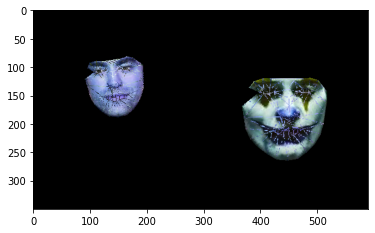

In [36]:
plt.imshow(img3)

In [33]:
delunay_traingle_pts_list[0][i].reshape(3,2).T

array([[441, 450, 442],
       [212, 212, 211]])

In [27]:
bounded_array_f
img2[bounded_array_f[:,1],bounded_array_f[:,0]]
img2[A_coord[:,1],A_coord[:,0]]
#A_coord

#A_coord/A_coord[-1]

NameError: name 'bounded_array_f' is not defined

In [ ]:
bayesian_coordinates_f.shape
A.shape
#mask[bayesian_coordinates>=1]=0
#~np.any(mask==0,axis=1)

In [ ]:
plt.imshow(img2)

In [ ]:
x